In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_csv("./train.csv")

In [3]:
data_frame.shape

(891, 12)

In [4]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**We are going to use the DecisionTree model; however, this model cannot work with strings, so we need to transform strings into float numbers using a "std" function down in code.**

In [5]:
data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_frame.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Because we have to much Cabin NaN values we will drop that column, this is not case with Age we are going to fill NaN values with median**

In [7]:
def fillNa(data_frame):
    # Iterate through each column
    for column in data_frame.columns:
        # If there are missing values in the column
        if data_frame[column].isnull().sum() > 0:
            # Extract existing values from the column
            existing_values = data_frame[column].dropna()
            # Calculate the distribution of existing values
            value_distribution = existing_values.value_counts(normalize=True)
            # Choose the number of missing values
            missing_count = data_frame[column].isnull().sum()
            # Generate new values based on the distribution
            new_values = np.random.choice(value_distribution.index, size=missing_count, p=value_distribution.values)
            # Fill missing values with new values
            data_frame.loc[data_frame[column].isnull(), column] = new_values


In [8]:
fillNa(data_frame)

In [9]:
from matplotlib import pyplot as plt

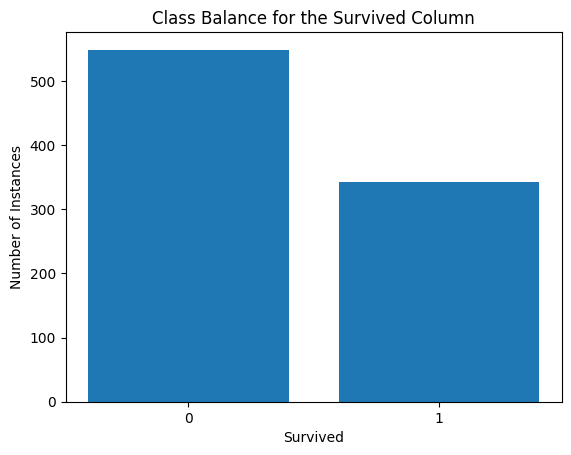

In [10]:
import matplotlib.pyplot as plt

# First, let's calculate the number of instances for each class
instances_count = data_frame['Survived'].value_counts()

# Plotting the graph
plt.bar(instances_count.index, instances_count.values)
plt.xlabel('Survived')
plt.ylabel('Number of Instances')
plt.title('Class Balance for the Survived Column')
plt.xticks([0, 1])
plt.show()


In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder

def encode_categorical_inplace(data_frame):
    # List of categorical columns
    categorical_columns = [col for col in data_frame.columns if data_frame[col].dtype == 'object']

    # Initialize OrdinalEncoder
    encoder = OrdinalEncoder()

    # Iterate through each categorical attribute
    for column in categorical_columns:
        # Check if the attribute is not numeric
        if not pd.api.types.is_numeric_dtype(data_frame[column]):
            # Convert the categorical attribute to numerical values
            data_frame[column] = encoder.fit_transform(data_frame[[column]])


In [13]:
encode_categorical_inplace(data_frame)
data_frame.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.697722,0.523008,0.381594,338.528620,32.204208,77.320988,1.535354
std,257.353842,0.486592,0.836071,257.353842,0.477990,14.375487,1.102743,0.806057,200.850657,49.693429,42.129045,0.791554
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,20.250000,0.000000,0.000000,158.500000,7.910400,43.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,75.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,38.500000,1.000000,0.000000,519.500000,31.000000,116.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


***We want to train and determine which hyperparameters are best for our model without peeking into the test set because we aim to prevent overfitting. Therefore, we will perform a train/test split to identify the optimal hyperparameters***

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data_frame.drop(['Survived', 'PassengerId'], axis=1)

In [16]:
Y = data_frame['Survived']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=0.75)

In [18]:
X_train.shape

(668, 10)

In [19]:
Y_train.shape

(668,)

In [20]:
cx = X_train.columns

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
def remove_outliers(X, y):
    # Konvertujemo DataFrame u NumPy niz
    X = np.array(X)
    y = np.array(y)
    # Inicijalizacija IsolationForest modela
    clf = IsolationForest(contamination=0.1, random_state=42)  # contamination je procenat outlejera
    # Fitovanje modela
    clf.fit(X)
    # Predikcija outlejera
    outliers = clf.predict(X)
    # Izdvajanje indeksa outlejera
    inlier_indices = np.where(outliers == 1)[0]
    # Uklanjanje outlejera iz X i y
    X_no_outliers = X[inlier_indices]
    y_no_outliers = y[inlier_indices]
    return pd.DataFrame(X_no_outliers), y_no_outliers


In [23]:
X_train, Y_train = remove_outliers(X_train, Y_train)
X_train.shape

(601, 10)

In [24]:
X_train.columns = cx

In [25]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
def train(X, y):
 
    model = RandomForestClassifier()

    param_grid = {
        'n_estimators': list(range(1, 20)),
        'max_depth': list(range(1, 15))
    }

    # Inicijalizacija GridSearchCV objekta
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_search.fit(X, y)
    # Najbolji model sa najboljim parametrima
    best_model = grid_search.best_estimator_
    # Treniranje najboljeg modela na celom skupu podataka
    best_model.fit(X, y)

    return best_model

In [27]:
trained_model = train(X_train, Y_train)

Text(0.5, 1.0, 'Feature importance')

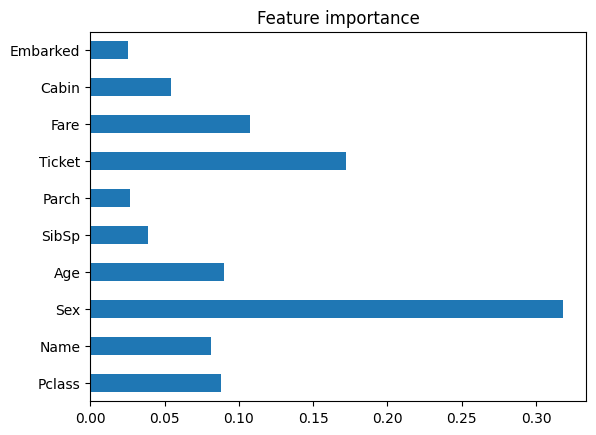

In [28]:
pd.Series(trained_model.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")

In [29]:
def test(Y_true, y_pred):
    print(accuracy_score(Y_true, y_pred))
    print(f1_score(Y_true, y_pred))

In [30]:
test(Y_test, trained_model.predict(X_test))

0.852017937219731
0.7898089171974523


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [32]:
X, Y =  remove_outliers(X, Y)
X.columns = cx

In [33]:
best_model = train(X, Y)

In [34]:
test_set = pd.read_csv('./test.csv')
id1 = test_set['PassengerId']
test_set.drop('PassengerId', inplace=True, axis=1)
fillNa(test_set)
encode_categorical_inplace(test_set)

In [35]:
predict = best_model.predict(test_set)

In [36]:
answer = pd.DataFrame({'PassengerId': id1, 'Survived': predict}).set_index('PassengerId')
answer.to_csv('answer.csv')

In [37]:
answer

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
